In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20210630030040-0000
KERNEL_ID = ddd8f86b-0d6f-4bf3-8f96-d0426aa2271f


In [2]:
html_data = requests.get('http://zipatlas.com/us/tx/houston/zip-code-comparison/population-density.htm')
beautiful_soup = BeautifulSoup(html_data.content, 'html.parser')
table_contents=[]
table=beautiful_soup.find_all('table')[13]

for row in table.findAll('tr'):
    td = row.find_all('td')
    rows = [row.text for row in td]
    table_contents.append(rows)

df=pd.DataFrame(table_contents)

new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header 

df[['Latitude','Longitude']] = df['Location'].str.split(',',expand=True)
df = df.drop(columns = ['#','Location','People / Sq. Mile','National Rank'])
df

,Zip Code,City,Population,Latitude,Longitude
1,77046,"Houston, Texas",471,29.733084,-95.430659
2,77081,"Houston, Texas","49,691",29.712099,-95.480935
3,77036,"Houston, Texas","76,146",29.699048,-95.536507
4,77006,"Houston, Texas","18,875",29.741003,-95.391271
5,77057,"Houston, Texas","35,491",29.744068,-95.489210
...,...,...,...,...,...
92,77049,"Houston, Texas","16,598",29.832928,-95.149040
93,77094,"Houston, Texas","7,779",29.769285,-95.681292
94,77050,"Houston, Texas","4,357",29.903351,-95.262070
95,77032,"Houston, Texas","10,796",29.987805,-95.353412


In [3]:
csv_path = 'https://opendata.arcgis.com/datasets/081f346d4b9b43d88fcdc79e2e6c4517_0.csv'
covid = pd.read_csv(csv_path)
covid.head()

,OBJECTID_1,OBJECTID,ZIP,POSTAL,STATE,DATE_MOD,code,ZIP_TYPE,Shape_STArea_1,Shape_STLength_1,...,TotalConfirmedCases,ActiveCases,ActiveCases_str,Recovered,Death,Death_str,EditDate,Today,Shape__Area,Shape__Length
0,1,223,77004,HOUSTON,TX,2011/10/12 00:00:00+00,HA,STANDARD,1.651628e+08,67522.582037,...,2034,6,6,1993,35,35,2021/06/29,2021/06/29,0.001431,0.199602
1,2,225,77006,HOUSTON,TX,2011/06/08 00:00:00+00,HA,STANDARD,6.314081e+07,43137.266443,...,1380,8,8,1365,7,7,2021/06/29,2021/06/29,0.000547,0.127231
2,3,222,77012,HOUSTON,TX,2011/06/13 00:00:00+00,HA,STANDARD,1.145897e+08,59775.655206,...,2292,8,8,2233,51,51,2021/06/29,2021/06/29,0.000993,0.176830
3,4,114,77017,HOUSTON,TX,2011/06/21 00:00:00+00,HA,STANDARD,2.735179e+08,97049.473041,...,3710,21,21,3627,62,62,2021/06/29,2021/06/29,0.002369,0.285727
4,5,61,77020,HOUSTON,TX,2011/06/14 00:00:00+00,HA,STANDARD,1.996653e+08,73186.942134,...,2751,19,19,2665,67,67,2021/06/29,2021/06/29,0.001731,0.217019


In [4]:
df['Zip Code'] = df['Zip Code'].astype('int64')
df['Population'] = df['Population'].str.replace(',','')
df['Population'] = df['Population'].astype('int64')

covid_loc = df.join(covid.set_index('ZIP'),on = 'Zip Code')
covid_loc = covid_loc.drop(columns = ['OBJECTID_1','OBJECTID','EditDate','Today','City','STATE','POSTAL','DATE_MOD','code','ZIP_TYPE','Shape_STArea_1','Shape_STLength_1','GDB_GEOMATTR_DATA','Shape__Area','Shape__Length'])
covid_loc

,Zip Code,Population,Latitude,Longitude,TotalPop,TotalConfirmedCases,ActiveCases,ActiveCases_str,Recovered,Death,Death_str
1,77046,471,29.733084,-95.430659,970,126,1,0-5,125,0,0-5
2,77081,49691,29.712099,-95.480935,52078,3996,23,23,3916,57,57
3,77036,76146,29.699048,-95.536507,76831,6346,32,32,6223,91,91
4,77006,18875,29.741003,-95.391271,22632,1380,8,8,1365,7,7
5,77057,35491,29.744068,-95.489210,41503,2860,23,23,2799,38,38
...,...,...,...,...,...,...,...,...,...,...,...
92,77049,16598,29.832928,-95.149040,35230,4203,23,23,4135,45,45
93,77094,7779,29.769285,-95.681292,9710,595,1,0-5,593,1,0-5
94,77050,4357,29.903351,-95.262070,4999,393,7,7,380,6,6
95,77032,10796,29.987805,-95.353412,14093,1734,25,25,1690,19,19


In [5]:
# The code was removed by Watson Studio for sharing.

Credentails Set: CLIENT_ID, CLIENT_SECRET, ACCESS_TOKEN


In [6]:
import json
from pandas.io.json import json_normalize

In [7]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [8]:
zip_size = covid_loc.shape[0]
nearby_venues = pd.DataFrame()
venue_list = pd.DataFrame()
no_venue = pd.DataFrame(columns=['No ZIP'])

radius = 1600
LIMIT = 500

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']

for i in range(0,zip_size):

    PostalCode_latitude = covid_loc.loc[i+1, 'Latitude'] # Postal Code latitude value
    PostalCode_longitude = covid_loc.loc[i+1, 'Longitude'] # Postal Code longitude value
    PostalCode_ZIP = covid_loc.loc[i+1, 'Zip Code'] # Postal Code value

    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, PostalCode_latitude, PostalCode_longitude, VERSION, radius, LIMIT)
    results = requests.get(url).json()
    
    venues = results['response']['groups'][0]['items']
    
    nearby_venues = nearby_venues.iloc[0:0]
    nearby_venues = json_normalize(venues) # flatten JSON
    
    if len(nearby_venues) == 0:
        no_venue = no_venue.append({'No ZIP' : PostalCode_ZIP}, ignore_index=True)
    else:
        nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
        nearby_venues = nearby_venues.loc[:, filtered_columns]
        nearby_venues['PostalCode'] = PostalCode_ZIP
    
        venue_list = venue_list.append(nearby_venues, ignore_index=True)

venue_list.columns = [col.split(".")[-1] for col in venue_list.columns]
venue_list

/opt/ibm/conda/miniconda/lib/python/site-packages/ipykernel/__main__.py:23: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,lat,lng,PostalCode
0,Eunice,Seafood Restaurant,29.732910,-95.428648,77046
1,Greenway Coffee & Tea,Coffee Shop,29.731085,-95.431795,77046
2,Levy Park,Park,29.732945,-95.424319,77046
3,100% Taquito,Mexican Restaurant,29.728784,-95.431001,77046
4,Urban Harvest Farmers Market,Farmers Market,29.735229,-95.424442,77046
...,...,...,...,...,...
4293,AB Books,Bookstore,29.896336,-95.175333,77044
4294,Shy Girls Saloon,Bar,29.884797,-95.161700,77044
4295,Garrett Road Ice House,Dive Bar,29.885035,-95.161340,77044
4296,Sheldon Aqueduct,River,29.888402,-95.158141,77044


In [9]:
no_venue

,No ZIP


In [11]:
#Create a reference table of Category hierarchy from Foursquare

url2 = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(CLIENT_ID, CLIENT_SECRET,VERSION)
results2 = requests.get(url2).json()
CAT = results2['response']['categories']
CAT_table = json_normalize(CAT)
CAT_table1 = pd.DataFrame()
CAT_table2 = pd.DataFrame()
CAT_table3 = pd.DataFrame()
CAT_table4 = pd.DataFrame()
CAT_table5 = pd.DataFrame()

CAT_size = CAT_table.shape[0]
CAT_hierarchy = pd.DataFrame()
CAT_level1 = pd.DataFrame()
CAT_level2 = pd.DataFrame()
CAT_level3 = pd.DataFrame()
CAT_level4 = pd.DataFrame()
CAT_level5 = pd.DataFrame()
Add_CAT = pd.DataFrame()

for i in range (0,CAT_size):
    
    #extract first level below parent hierarchy from json
    CAT_table1 = CAT_table1.iloc[0:0]
    CAT1 = results2['response']['categories'][i]['categories']
    CAT_table1 = json_normalize(CAT1)
    CAT_level1 = CAT_level1.iloc[0:0]
    CAT_level1 = CAT_table1.drop(columns = ['id','pluralName','shortName','categories','icon.prefix','icon.suffix'])
    CAT_level1 = CAT_level1.rename(columns = {'name' : 'CAT Level 1'})
    CAT_level1['CAT Parent'] = CAT_table['name'][i]
    
    #add parent name as a category at lower levels
    CAT_name = CAT_table['name'][i]
    
    Add_CAT = {'CAT Parent' : CAT_name, 'CAT Level 1' : CAT_name}
    
    CAT_level1 = CAT_level1.append(Add_CAT, ignore_index = True)
    
    #add first level below parent hierarchy at lower levels
    CAT_level1['CAT Level 2'] = CAT_level1['CAT Level 1']
    CAT_level1['CAT Level 3'] = CAT_level1['CAT Level 1']
    CAT_level1['CAT Level 4'] = CAT_level1['CAT Level 1']
    CAT_level1['CAT Level 5'] = CAT_level1['CAT Level 1']
    
    #prepare to extract from lower level
    CAT_size1 = CAT_table1.shape[0]
    
    for a in range (0, CAT_size1):
        
        #turn second level below parent hierarchy from json
        CAT_table2 = CAT_table2.iloc[0:0]
        CAT2 = results2['response']['categories'][i]['categories'][a]['categories']
        CAT_table2 = json_normalize(CAT2)
        
        #Not all first level below parent has a second level so only when it does we can extract it
        if len(CAT_table2) == 0:
            
            CAT_level2 = CAT_level2.iloc[0:0]
            
        else:
            
            #extract second level below parent hierarchy from json
            CAT_level2 = CAT_level2.iloc[0:0]
            CAT_level2 = CAT_table2.drop(columns = ['id','pluralName','shortName','categories','icon.prefix','icon.suffix'])
            CAT_level2 = CAT_level2.rename(columns = {'name' : 'CAT Level 2'})
            CAT_level2['CAT Parent'] = CAT_table['name'][i]
            CAT_level2['CAT Level 1'] = CAT_table1['name'][a]
            
            #add second level below parent name as a category at lower levels
            CAT_level2['CAT Level 3'] = CAT_level2['CAT Level 2']
            CAT_level2['CAT Level 4'] = CAT_level2['CAT Level 2']
            CAT_level2['CAT Level 5'] = CAT_level2['CAT Level 2']
            
            CAT_size2 = CAT_table2.shape[0]
            
            for b in range (0, CAT_size2):
                
                #turn third level below parent hierarchy from json
                CAT_table3 = CAT_table3.iloc[0:0]
                CAT3 = results2['response']['categories'][i]['categories'][a]['categories'][b]['categories']
                CAT_table3 = json_normalize(CAT3)
                                
                if len(CAT_table3) == 0:
                    
                    CAT_level3 = CAT_level3.iloc[0:0]
                    
                else:
                    
                    #extract third level below parent hierarchy from json
                    CAT_level3 = CAT_level3.iloc[0:0]
                    CAT_level3 = CAT_table3.drop(columns = ['id','pluralName','shortName','categories','icon.prefix','icon.suffix'])
                    CAT_level3 = CAT_level3.rename(columns = {'name' : 'CAT Level 3'})
                    CAT_level3['CAT Parent'] = CAT_table['name'][i]
                    CAT_level3['CAT Level 1'] = CAT_table1['name'][a]
                    CAT_level3['CAT Level 2'] = CAT_table2['name'][b]
                    
                    #add third level below parent name as a category at lower levels
                    CAT_level3['CAT Level 4'] = CAT_level3['CAT Level 3']
                    CAT_level3['CAT Level 5'] = CAT_level3['CAT Level 3']
            
                    CAT_size3 = CAT_table3.shape[0]
                    
                    for c in range (0, CAT_size3):
                        
                        #turn forth level below parent hierarchy from json
                        CAT_table4 = CAT_table4.iloc[0:0]
                        CAT4 = results2['response']['categories'][i]['categories'][a]['categories'][b]['categories'][c]['categories']
                        CAT_table4 = json_normalize(CAT4)
                                
                        if len(CAT_table4) == 0:
                    
                            CAT_level4 = CAT_level4.iloc[0:0]
                    
                        else:
                            
                            #extract fourth level below parent hierarchy from json
                            CAT_level4 = CAT_level4.iloc[0:0]
                            CAT_level4 = CAT_table4.drop(columns = ['id','pluralName','shortName','categories','icon.prefix','icon.suffix'])
                            CAT_level4 = CAT_level4.rename(columns = {'name' : 'CAT Level 4'})
                            CAT_level4['CAT Parent'] = CAT_table['name'][i]
                            CAT_level4['CAT Level 1'] = CAT_table1['name'][a]
                            CAT_level4['CAT Level 2'] = CAT_table2['name'][b]
                            CAT_level4['CAT Level 3'] = CAT_table3['name'][c]
                    
                            #add fourth level below parent name as a category at lower levels
                            CAT_level4['CAT Level 5'] = CAT_level4['CAT Level 4']
            
                            CAT_size4 = CAT_table4.shape[0]
                            
                            for d in range (0,CAT_size4):
                                
                                #turn fith level below parent hierarchy from json
                                CAT_table5 = CAT_table5.iloc[0:0]
                                CAT5 = results2['response']['categories'][i]['categories'][a]['categories'][b]['categories'][c]['categories'][d]['categories']
                                CAT_table5 = json_normalize(CAT5)
                                
                                if len(CAT_table5) == 0:
                    
                                    CAT_level5 = CAT_level5.iloc[0:0]
                    
                                else:
                            
                                    #extract fith level below parent hierarchy from json
                                    CAT_level5 = CAT_level5.iloc[0:0]
                                    CAT_level5 = CAT_table5.drop(columns = ['id','pluralName','shortName','categories','icon.prefix','icon.suffix'])
                                    CAT_level5 = CAT_level5.rename(columns = {'name' : 'CAT Level 5'})
                                    CAT_level5['CAT Parent'] = CAT_table['name'][i]
                                    CAT_level5['CAT Level 1'] = CAT_table1['name'][a]
                                    CAT_level5['CAT Level 2'] = CAT_table2['name'][b]
                                    CAT_level5['CAT Level 3'] = CAT_table3['name'][c]
                                    CAT_level5['CAT Level 4'] = CAT_table4['name'][d]
                                    
                                    
                                    #Append Categories to table on higher level
                                    CAT_level4 = CAT_level4.append(CAT_level5, ignore_index = True)
                                    
                            CAT_level3 = CAT_level3.append(CAT_level4, ignore_index = True)
                    
                    CAT_level2 = CAT_level2.append(CAT_level3, ignore_index = True)
            
            CAT_level1 = CAT_level1.append(CAT_level2, ignore_index = True)
    
    CAT_hierarchy = CAT_hierarchy.append(CAT_level1, ignore_index = True)
        

CAT_hierarchy

/opt/ibm/conda/miniconda/lib/python/site-packages/ipykernel/__main__.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/opt/ibm/conda/miniconda/lib/python/site-packages/ipykernel/__main__.py:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/opt/ibm/conda/miniconda/lib/python/site-packages/ipykernel/__main__.py:54: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/opt/ibm/conda/miniconda/lib/python/site-packages/ipykernel/__main__.py:82: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/opt/ibm/conda/miniconda/lib/python/site-packages/ipykernel/__main__.py:109: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
/opt/ibm/conda/miniconda/lib/python/site-packages/ipykernel/__main__.py:136: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.js

,CAT Level 1,CAT Parent,CAT Level 2,CAT Level 3,CAT Level 4,CAT Level 5
0,Amphitheater,Arts & Entertainment,Amphitheater,Amphitheater,Amphitheater,Amphitheater
1,Aquarium,Arts & Entertainment,Aquarium,Aquarium,Aquarium,Aquarium
2,Arcade,Arts & Entertainment,Arcade,Arcade,Arcade,Arcade
3,Art Gallery,Arts & Entertainment,Art Gallery,Art Gallery,Art Gallery,Art Gallery
4,Bowling Alley,Arts & Entertainment,Bowling Alley,Bowling Alley,Bowling Alley,Bowling Alley
...,...,...,...,...,...,...
966,Hotel,Travel & Transport,Motel,Motel,Motel,Motel
967,Hotel,Travel & Transport,Resort,Resort,Resort,Resort
968,Hotel,Travel & Transport,Vacation Rental,Vacation Rental,Vacation Rental,Vacation Rental
969,Train Station,Travel & Transport,Platform,Platform,Platform,Platform


In [12]:
venue_list_Parent_category = venue_list.join(CAT_hierarchy.set_index('CAT Level 5'), on='categories')
venue_list_Parent_category

,name,categories,lat,lng,PostalCode,CAT Level 1,CAT Parent,CAT Level 2,CAT Level 3,CAT Level 4
0,Eunice,Seafood Restaurant,29.732910,-95.428648,77046,Seafood Restaurant,Food,Seafood Restaurant,Seafood Restaurant,Seafood Restaurant
1,Greenway Coffee & Tea,Coffee Shop,29.731085,-95.431795,77046,Coffee Shop,Food,Coffee Shop,Coffee Shop,Coffee Shop
2,Levy Park,Park,29.732945,-95.424319,77046,Park,Outdoors & Recreation,Park,Park,Park
3,100% Taquito,Mexican Restaurant,29.728784,-95.431001,77046,Mexican Restaurant,Food,Mexican Restaurant,Mexican Restaurant,Mexican Restaurant
4,Urban Harvest Farmers Market,Farmers Market,29.735229,-95.424442,77046,Food & Drink Shop,Shop & Service,Farmers Market,Farmers Market,Farmers Market
...,...,...,...,...,...,...,...,...,...,...
4293,AB Books,Bookstore,29.896336,-95.175333,77044,Bookstore,Shop & Service,Bookstore,Bookstore,Bookstore
4294,Shy Girls Saloon,Bar,29.884797,-95.161700,77044,Bar,Nightlife Spot,Bar,Bar,Bar
4295,Garrett Road Ice House,Dive Bar,29.885035,-95.161340,77044,Bar,Nightlife Spot,Dive Bar,Dive Bar,Dive Bar
4296,Sheldon Aqueduct,River,29.888402,-95.158141,77044,River,Outdoors & Recreation,River,River,River


In [13]:
venue_onehot = pd.get_dummies(venue_list_Parent_category[['CAT Parent']], prefix="", prefix_sep="")

venue_onehot['PostalCode'] = venue_list_Parent_category['PostalCode'] 

fixed_columns = [venue_onehot.columns[-1]] + list(venue_onehot.columns[:-1])
venue_onehot = venue_onehot[fixed_columns]

venue_grouped = venue_onehot.groupby('PostalCode').sum().reset_index()
venue_grouped

,PostalCode,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,77002,16,0,42,18,7,0,0,6,11
1,77003,11,0,48,18,6,0,0,12,5
2,77004,3,0,30,8,3,0,0,12,3
3,77005,1,0,55,8,5,0,0,31,0
4,77006,4,0,63,15,3,0,0,15,0
...,...,...,...,...,...,...,...,...,...,...
91,77094,1,0,0,0,3,0,0,2,1
92,77095,0,0,4,0,3,0,0,3,2
93,77096,0,0,20,0,8,1,0,22,0
94,77098,0,0,65,10,6,0,0,19,0


In [14]:
venue_count = venue_list.groupby('PostalCode').count().reset_index()
venue_count = venue_count.drop(columns = ['name','lat','lng'])
venue_count = venue_count.rename(columns = {'categories':'Total_venues'})
venue_count

,PostalCode,Total_venues
0,77002,100
1,77003,100
2,77004,59
3,77005,100
4,77006,100
...,...,...
91,77094,7
92,77095,12
93,77096,51
94,77098,100


In [15]:
venue_grouped_covid = venue_grouped.join(covid_loc.set_index('Zip Code'),on='PostalCode')
# venue_grouped = venue_grouped.drop(columns = ['Shape__Area','Shape__Length'])
venue_grouped_covid

,PostalCode,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Population,Latitude,Longitude,TotalPop,TotalConfirmedCases,ActiveCases,ActiveCases_str,Recovered,Death,Death_str
0,77002,16,0,42,18,7,0,0,6,11,13289,29.756845,-95.365652,13571,2053,9,9,2034,10,10
1,77003,11,0,48,18,6,0,0,12,5,9195,29.749563,-95.346265,9876,1110,5,0-5,1088,17,17
2,77004,3,0,30,8,3,0,0,12,3,30379,29.724893,-95.363752,36959,2034,6,6,1993,35,35
3,77005,1,0,55,8,5,0,0,31,0,23338,29.718435,-95.423555,28552,1120,3,0-5,1110,7,7
4,77006,4,0,63,15,3,0,0,15,0,18875,29.741003,-95.391271,22632,1380,8,8,1365,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,77094,1,0,0,0,3,0,0,2,1,7779,29.769285,-95.681292,9710,595,1,0-5,593,1,0-5
92,77095,0,0,4,0,3,0,0,3,2,39275,29.916055,-95.663077,71878,5522,42,42,5428,52,52
93,77096,0,0,20,0,8,1,0,22,0,33987,29.674133,-95.478354,33769,2153,13,13,2119,21,21
94,77098,0,0,65,10,6,0,0,19,0,12179,29.734813,-95.416098,13549,944,8,8,927,9,9


In [16]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [17]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['PostalCode']
columns2 = ['PostalCode']
columns3 = ['PostalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        columns2.append('Number of {}{} Venues'.format(ind+1, indicators[ind]))
        columns3.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        columns3.append('Number of {}{} Venues'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        columns2.append('Number of {}th Venues'.format(ind+1))
        columns3.append('{}th Most Common Venue'.format(ind+1))
        columns3.append('Number of {}th Venues'.format(ind+1))
        
# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['PostalCode'] = venue_grouped['PostalCode']

venues_sorted2 = pd.DataFrame(columns=columns2)
venues_sorted2['PostalCode'] = venue_grouped['PostalCode']

for ind in np.arange(venue_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(venue_grouped.iloc[ind, :], num_top_venues)
    venues_sorted2.iloc[ind, 1:] = venue_grouped[return_most_common_venues(venue_grouped.iloc[ind, :], num_top_venues)].iloc[ind, :].tolist()

venues_sorted = venues_sorted.join(venues_sorted2.set_index('PostalCode'),on='PostalCode')
venues_sorted = venues_sorted[columns3]
    
venues_sorted.head()

,PostalCode,1st Most Common Venue,Number of 1st Venues,2nd Most Common Venue,Number of 2nd Venues,3rd Most Common Venue,Number of 3rd Venues,4th Most Common Venue,Number of 4th Venues,5th Most Common Venue,Number of 5th Venues
0,77002,Food,42,Nightlife Spot,18,Arts & Entertainment,16,Travel & Transport,11,Outdoors & Recreation,7
1,77003,Food,48,Nightlife Spot,18,Shop & Service,12,Arts & Entertainment,11,Outdoors & Recreation,6
2,77004,Food,30,Shop & Service,12,Nightlife Spot,8,Travel & Transport,3,Outdoors & Recreation,3
3,77005,Food,55,Shop & Service,31,Nightlife Spot,8,Outdoors & Recreation,5,Arts & Entertainment,1
4,77006,Food,63,Shop & Service,15,Nightlife Spot,15,Arts & Entertainment,4,Outdoors & Recreation,3


In [18]:
import matplotlib.pyplot as plt

In [19]:
venue_count_covid = venue_count.join(covid_loc.set_index('Zip Code'),on='PostalCode')
# venue_grouped = venue_grouped.drop(columns = ['Shape__Area','Shape__Length'])
venue_count_covid

,PostalCode,Total_venues,Population,Latitude,Longitude,TotalPop,TotalConfirmedCases,ActiveCases,ActiveCases_str,Recovered,Death,Death_str
0,77002,100,13289,29.756845,-95.365652,13571,2053,9,9,2034,10,10
1,77003,100,9195,29.749563,-95.346265,9876,1110,5,0-5,1088,17,17
2,77004,59,30379,29.724893,-95.363752,36959,2034,6,6,1993,35,35
3,77005,100,23338,29.718435,-95.423555,28552,1120,3,0-5,1110,7,7
4,77006,100,18875,29.741003,-95.391271,22632,1380,8,8,1365,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...
91,77094,7,7779,29.769285,-95.681292,9710,595,1,0-5,593,1,0-5
92,77095,12,39275,29.916055,-95.663077,71878,5522,42,42,5428,52,52
93,77096,51,33987,29.674133,-95.478354,33769,2153,13,13,2119,21,21
94,77098,100,12179,29.734813,-95.416098,13549,944,8,8,927,9,9


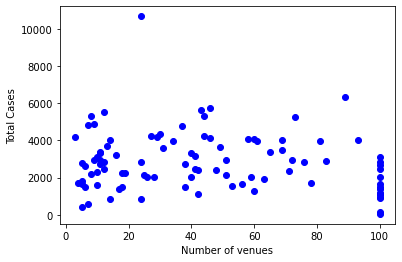

In [20]:
plt.scatter(venue_count_covid.Total_venues, venue_count_covid.TotalConfirmedCases,  color='blue')
plt.xlabel("Number of venues")
plt.ylabel("Total Cases")
plt.show()

In [21]:
from sklearn.cluster import KMeans

In [22]:
# set number of clusters
kclusters = 5

Houston_grouped_clustering = venue_grouped_covid.drop(columns = ['PostalCode','Latitude','Longitude','Population','ActiveCases_str','Recovered','Death_str','TotalPop','ActiveCases'])

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Houston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 3, 2, 1, 2, 0, 2, 2],
      dtype=int32)

In [23]:
venue_grouped_covid

,PostalCode,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Population,Latitude,Longitude,TotalPop,TotalConfirmedCases,ActiveCases,ActiveCases_str,Recovered,Death,Death_str
0,77002,16,0,42,18,7,0,0,6,11,13289,29.756845,-95.365652,13571,2053,9,9,2034,10,10
1,77003,11,0,48,18,6,0,0,12,5,9195,29.749563,-95.346265,9876,1110,5,0-5,1088,17,17
2,77004,3,0,30,8,3,0,0,12,3,30379,29.724893,-95.363752,36959,2034,6,6,1993,35,35
3,77005,1,0,55,8,5,0,0,31,0,23338,29.718435,-95.423555,28552,1120,3,0-5,1110,7,7
4,77006,4,0,63,15,3,0,0,15,0,18875,29.741003,-95.391271,22632,1380,8,8,1365,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,77094,1,0,0,0,3,0,0,2,1,7779,29.769285,-95.681292,9710,595,1,0-5,593,1,0-5
92,77095,0,0,4,0,3,0,0,3,2,39275,29.916055,-95.663077,71878,5522,42,42,5428,52,52
93,77096,0,0,20,0,8,1,0,22,0,33987,29.674133,-95.478354,33769,2153,13,13,2119,21,21
94,77098,0,0,65,10,6,0,0,19,0,12179,29.734813,-95.416098,13549,944,8,8,927,9,9


In [25]:
# venue_grouped_covid2 = venue_grouped_covid2.drop(columns = ['Cluster Labels'])
# venues_sorted = venues_sorted.drop(columns = ['Cluster Labels'])
# venue_grouped_covid = venue_grouped_covid.drop(columns = ['Cluster Labels'])

In [26]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
venue_grouped_covid2 = venue_grouped_covid
venue_grouped_covid2.insert(0, 'Cluster Labels', kmeans.labels_)

Houston_merged = covid_loc
Houston_merged2 = covid_loc
no_venue_size = no_venue.shape[0]

for i in range(0,no_venue_size):
    Houston_merged.drop(no_venue['No ZIP'].index[i])
    Houston_merged2.drop(no_venue['No ZIP'].index[i])

Houston_merged = Houston_merged.join(venues_sorted.set_index('PostalCode'), on='Zip Code')

Houston_merged = Houston_merged.drop(columns = ['Population','ActiveCases_str', 'Recovered', 'Death_str'])
Houston_merged.head()

,Zip Code,Latitude,Longitude,TotalPop,TotalConfirmedCases,ActiveCases,Death,Cluster Labels,1st Most Common Venue,Number of 1st Venues,2nd Most Common Venue,Number of 2nd Venues,3rd Most Common Venue,Number of 3rd Venues,4th Most Common Venue,Number of 4th Venues,5th Most Common Venue,Number of 5th Venues
1,77046,29.733084,-95.430659,970,126,1,0,0,Food,72,Shop & Service,16,Outdoors & Recreation,6,Nightlife Spot,4,Travel & Transport,1
2,77081,29.712099,-95.480935,52078,3996,23,57,1,Food,54,Shop & Service,33,Outdoors & Recreation,3,Arts & Entertainment,2,Travel & Transport,1
3,77036,29.699048,-95.536507,76831,6346,32,91,3,Food,58,Shop & Service,24,Outdoors & Recreation,7,Travel & Transport,0,Residence,0
4,77006,29.741003,-95.391271,22632,1380,8,7,0,Food,63,Shop & Service,15,Nightlife Spot,15,Arts & Entertainment,4,Outdoors & Recreation,3
5,77057,29.744068,-95.489210,41503,2860,23,38,2,Food,61,Shop & Service,29,Outdoors & Recreation,6,Nightlife Spot,2,Travel & Transport,1


In [27]:
Houston_merged2 = Houston_merged2.drop(columns = ['Population', 'Latitude', 'Longitude', 'TotalPop', 'TotalConfirmedCases', 'ActiveCases', 'ActiveCases_str', 'Recovered', 'Death', 'Death_str'])
Houston_merged2 = Houston_merged2.join(venue_grouped_covid2.set_index('PostalCode'), on='Zip Code')
Houston_merged2 = Houston_merged2.drop(columns = ['Population','ActiveCases_str', 'Recovered', 'Death_str'])
Houston_merged2.head()

,Zip Code,Cluster Labels,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Latitude,Longitude,TotalPop,TotalConfirmedCases,ActiveCases,Death
1,77046,0,0,0,72,4,6,1,0,16,1,29.733084,-95.430659,970,126,1,0
2,77081,1,2,0,54,0,3,0,0,33,1,29.712099,-95.480935,52078,3996,23,57
3,77036,3,0,0,58,0,7,0,0,24,0,29.699048,-95.536507,76831,6346,32,91
4,77006,0,4,0,63,15,3,0,0,15,0,29.741003,-95.391271,22632,1380,8,7
5,77057,2,0,0,61,2,6,1,0,29,1,29.744068,-95.489210,41503,2860,23,38


In [28]:
# The code was removed by Watson Studio for sharing.

In [30]:
project.save_data('capstone_coursera_CN6.csv', Houston_merged2.to_csv(index=False))

{'file_name': 'capstone_coursera_CN6.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'courseracapstoneproject-donotdelete-pr-evinszgearg8rf',
 'asset_id': '9e81f49d-b5ed-495a-9d15-592bc5b14d01'}

In [31]:
Houston_merged['Cluster Labels'].dtypes

dtype('int32')

In [32]:
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

In [33]:
covid_loc['Longitude'] = covid_loc['Longitude'].astype(float)
covid_loc['Latitude'] = covid_loc['Latitude'].astype(float)
covid_loc.dtypes

Zip Code                 int64
Population               int64
Latitude               float64
Longitude              float64
TotalPop                 int64
TotalConfirmedCases      int64
ActiveCases              int64
ActiveCases_str         object
Recovered                int64
Death                    int64
Death_str               object
dtype: object

In [34]:
latitude = covid_loc['Latitude'].mean()
longitude = covid_loc['Longitude'].mean()

In [35]:
Houston_merged['Longitude'] = Houston_merged['Longitude'].astype(float)
Houston_merged['Latitude'] = Houston_merged['Latitude'].astype(float)
Houston_merged.dtypes

Zip Code                   int64
Latitude                 float64
Longitude                float64
TotalPop                   int64
TotalConfirmedCases        int64
ActiveCases                int64
Death                      int64
Cluster Labels             int32
1st Most Common Venue     object
Number of 1st Venues      object
2nd Most Common Venue     object
Number of 2nd Venues      object
3rd Most Common Venue     object
Number of 3rd Venues      object
4th Most Common Venue     object
Number of 4th Venues      object
5th Most Common Venue     object
Number of 5th Venues      object
dtype: object

In [36]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(Houston_merged['Latitude'], Houston_merged['Longitude'], Houston_merged['TotalConfirmedCases'], Houston_merged['Cluster Labels']):
    label = folium.Popup('Total COVID Cases '+str(poi) +
                         '\nCluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters